# Knapsack problem
* Find the best value of weight

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_knapsack(filename):
    with open(filename, 'r') as f:
        # Read non-empty lines and strip whitespace
        lines = [line.strip() for line in f if line.strip() != '']
    n = int(lines[0])
    capacity = int(lines[1]) 
    items = []
    # The rest of the lines contain the items.
    for line in lines[2:]:
        profit, weight = map(int, line.split())
        items.append((profit, weight))    
    return n, capacity, items

def create_initial_population(num_items, population_size):
    pop = []
    for _ in range(population_size):
        pop.append([random.choice([0, 1]) for _ in range(num_items)])
    return pop



In [10]:
def calculate_fitness(individual, items, capacity):
    total_profit = sum(gene * item[0] for gene, item in zip(individual, items))
    total_weight = sum(gene * item[1] for gene, item in zip(individual, items))
    if total_weight > capacity:
        return 0  # or you could penalize proportionally
    return total_profit

In [30]:
def tournament_selection(population, items, capacity, k=3):
    # Randomly select k candidates from the population
    tournament = random.sample(population, k)
    # Return the candidate with the highest fitness
    return max(tournament, key=lambda ind: calculate_fitness(ind, items, capacity))


In [53]:
def one_point_crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child = parent1[:point] + parent2[point:]
    return child

def bitflip_mutation(individual, mutation_rate=0.2):
    mutated = individual.copy()  # make a copy
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            mutated[i] = 1 - mutated[i]  # flip 0 to 1 or 1 to 0
    return mutated

In [54]:
def genetic_algorithm_knapsack(filename, pop_size=100, generations=500, mutation_rate=0.2, tournament_size=5, crossover_rate=0.6):
    # Load problem instance
    n, capacity, items = load_knapsack(filename)
    population = create_initial_population(pop_size, n)
    convergence = []  # Store best fitness per generation

    for gen in range(generations):
        # Evaluate fitness and sort population
        fitness_values = [calculate_fitness(ind, items, capacity) for ind in population]
        best_fit = max(fitness_values)
        best_individual = population[fitness_values.index(best_fit)]
        convergence.append(best_fit)

        # Output metrics every 10 generations
        if (gen + 1) % 10 == 0:
            total_weight = sum(gene * item[1] for gene, item in zip(best_individual, items))
            print(f"Generation {gen + 1}: Best Profit = {best_fit}, Total Weight = {total_weight}")

        # Create new population
        new_pop = []
        while len(new_pop) < pop_size:
            # Selection: Choose two parents using tournament selection
            p1 = tournament_selection(population, items, capacity, tournament_size)
            p2 = tournament_selection(population, items, capacity, tournament_size)
            child = one_point_crossover(p1, p2) if random.random() < crossover_rate else p1[:]
            if random.random() < mutation_rate:
                child = bitflip_mutation(child, mutation_rate)
            new_pop.append(child)

        population = new_pop  # Replace old population

    return convergence, best_individual, best_fit, items, capacity

In [55]:
def plot_convergence(best_fitness_values):
    """
    Plots the convergence of the genetic algorithm.
    
    :param best_fitness_values: List of best fitness values at each generation
    """
    plt.figure(figsize=(10, 5))
    plt.plot(best_fitness_values, label="Best Fitness Over Time", color="blue")
    plt.xlabel("Generations")
    plt.ylabel("Best Fitness Value")
    plt.title("Convergence of Genetic Algorithm on Knapsack Problem")
    plt.legend()
    plt.grid()
    plt.show()

Generation 10: Best Profit = 50714, Total Weight = 39604
Generation 20: Best Profit = 51325, Total Weight = 40563
Generation 30: Best Profit = 51325, Total Weight = 40563
Generation 40: Best Profit = 51325, Total Weight = 40563
Generation 50: Best Profit = 51325, Total Weight = 40563
Generation 60: Best Profit = 51325, Total Weight = 40563
Generation 70: Best Profit = 51325, Total Weight = 40563
Generation 80: Best Profit = 51325, Total Weight = 40563
Generation 90: Best Profit = 51325, Total Weight = 40563
Generation 100: Best Profit = 51325, Total Weight = 40563
Generation 110: Best Profit = 51325, Total Weight = 40563
Generation 120: Best Profit = 51325, Total Weight = 40563
Generation 130: Best Profit = 51325, Total Weight = 40563
Generation 140: Best Profit = 51325, Total Weight = 40563
Generation 150: Best Profit = 51325, Total Weight = 40563
Generation 160: Best Profit = 51325, Total Weight = 40563
Generation 170: Best Profit = 51325, Total Weight = 40563
Generation 180: Best Pr

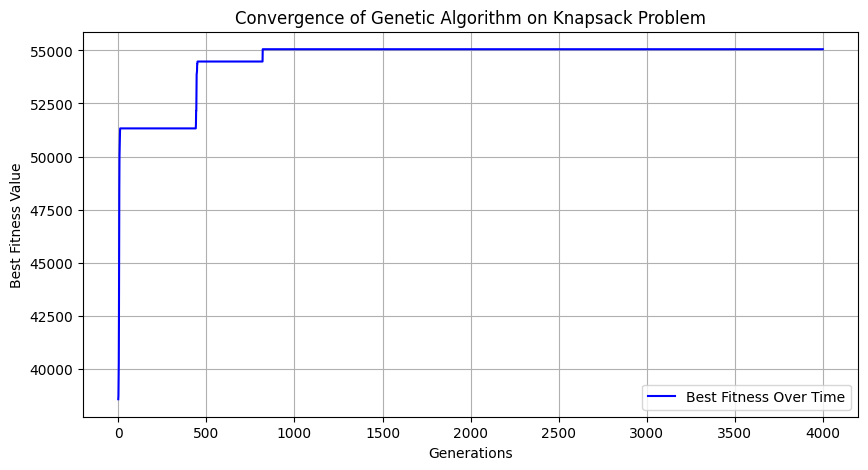

In [57]:
filename = "/Users/ap/Documents/MLroadtowisdom/ACIT4610/knapsack/s000500.kp"  # Replace with your .kp file path
convergence,best_individual, best_profit, items, capacity,  = genetic_algorithm_knapsack(filename, pop_size=100, generations=4000, mutation_rate=0.2)
total_weight = sum(gene * item[1] for gene, item in zip(best_individual, items))
print("\nFinal Best Solution:")
print("Selected Items (binary list):", best_individual)
print("Total Profit:", best_profit)
print("Total Weight:", total_weight)
print("Capacity:", capacity)
plot_convergence(convergence)


Running GA with Population = 20, Mutation Rate = 0.1
Generation 10: Best Profit = 11408, Total Weight = 8165
Generation 20: Best Profit = 12027, Total Weight = 8777
Generation 30: Best Profit = 12027, Total Weight = 8777
Generation 40: Best Profit = 12027, Total Weight = 8777
Generation 50: Best Profit = 12027, Total Weight = 8777
Generation 60: Best Profit = 12278, Total Weight = 9338
Generation 70: Best Profit = 12278, Total Weight = 9338
Generation 80: Best Profit = 12278, Total Weight = 9338
Generation 90: Best Profit = 12278, Total Weight = 9338
Generation 100: Best Profit = 12278, Total Weight = 9338
Generation 110: Best Profit = 12278, Total Weight = 9338
Generation 120: Best Profit = 12278, Total Weight = 9338
Generation 130: Best Profit = 12278, Total Weight = 9338
Generation 140: Best Profit = 12278, Total Weight = 9338
Generation 150: Best Profit = 12278, Total Weight = 9338
Generation 160: Best Profit = 12278, Total Weight = 9338
Generation 170: Best Profit = 12278, Total 

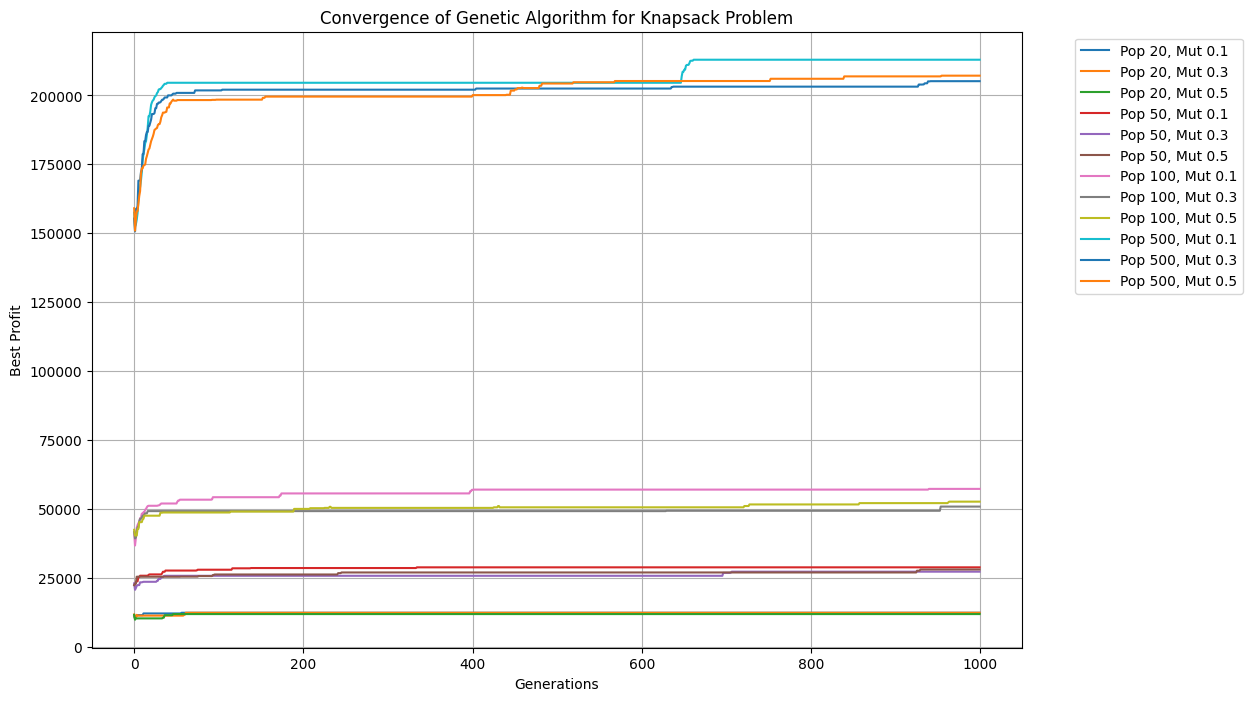


=== Summary of Results ===
Configuration        Best Profit     Total Weight    Time (s)  
Pop 20, Mut 0.1      12278           9338            0.97      
Pop 20, Mut 0.3      12278           9338            0.86      
Pop 20, Mut 0.5      11801           9136            0.96      
Pop 50, Mut 0.1      28763           24108           3.98      
Pop 50, Mut 0.3      27187           22248           4.17      
Pop 50, Mut 0.5      27975           23816           4.27      
Pop 100, Mut 0.1     57232           46746           14.45     
Pop 100, Mut 0.3     50809           42502           14.29     
Pop 100, Mut 0.5     52602           41984           14.90     
Pop 500, Mut 0.1     212981          190131          329.37    
Pop 500, Mut 0.3     205195          178209          333.31    
Pop 500, Mut 0.5     207194          185554          336.69    


In [49]:
import time
import matplotlib.pyplot as plt

# Test configuration
filename = "/Users/ap/Documents/MLroadtowisdom/ACIT4610/knapsack/s10000.kp"
population_sizes = [20, 50, 100, 500]
mutation_rates = [0.1, 0.3, 0.5]
tournament_size = 5
generations = 1000
crossover_rate = 0.5

# Store results for comparison
results = {}

# Loop through all combinations of population sizes and mutation rates
for pop_size in population_sizes:
    for mut_rate in mutation_rates:
        print(f"\nRunning GA with Population = {pop_size}, Mutation Rate = {mut_rate}")
        
        # Measure execution time
        start_time = time.time()
        convergence, best_individual, best_profit, items, capacity = genetic_algorithm_knapsack(
            filename,
            pop_size=pop_size,
            generations=generations,
            mutation_rate=mut_rate,
            tournament_size=tournament_size,
            crossover_rate=crossover_rate
        )
        end_time = time.time()
        total_time = end_time - start_time
        
        # Calculate total weight
        total_weight = sum(gene * item[1] for gene, item in zip(best_individual, items))
        
        # Store results
        key = f"Pop {pop_size}, Mut {mut_rate}"
        results[key] = {
            'Best Profit': best_profit,
            'Total Weight': total_weight,
            'Time (s)': total_time,
            'Convergence': convergence
        }
        
        # Output metrics
        print(f"Best Profit = {best_profit}, Total Weight = {total_weight}, Time = {total_time:.2f} s")

# Plot all convergence curves together
plt.figure(figsize=(12, 8))
for key, result in results.items():
    plt.plot(result['Convergence'], label=key)
plt.xlabel("Generations")
plt.ylabel("Best Profit")
plt.title("Convergence of Genetic Algorithm for Knapsack Problem")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Print summary of best profits and execution times
print("\n=== Summary of Results ===")
print("{:<20} {:<15} {:<15} {:<10}".format("Configuration", "Best Profit", "Total Weight", "Time (s)"))
print("="*60)
for key, result in results.items():
    print("{:<20} {:<15} {:<15} {:<10.2f}".format(
        key,
        result['Best Profit'],
        result['Total Weight'],
        result['Time (s)']
    ))
